# Introduction to PyTorch


Python-based scientific computing package for two main purposes:

* Replacement for **NumPy** to use the power of GPUs
* **Deep learning** research platform that provides maximum flexibility and speed


Sources:


*   https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e
*   https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html



### 1) Basic operations

In [23]:
import numpy as np

x = np.zeros((3, 3))
print(x)

y = x + 1
print(y)

z = np.random.randn(3, 3)
print(z)

print(y.dot(z))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[ 1.71896209 -0.3981543  -0.02508786]
 [-0.25462723  2.01983629 -0.26238413]
 [-0.46152725  0.2849291   0.54375061]]
[[1.00280761 1.90661109 0.25627862]
 [1.00280761 1.90661109 0.25627862]
 [1.00280761 1.90661109 0.25627862]]


In [24]:
import torch

x = torch.zeros(3, 3)
print(x)

y = x + 1
print(y)

z = torch.randn(3, 3)
print(z)

print(y.matmul(z))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[ 1.1944,  0.2692, -1.8129],
        [-0.3849,  0.1849,  0.8024],
        [ 0.5370, -1.1787,  0.4721]])
tensor([[ 1.3466, -0.7246, -0.5384],
        [ 1.3466, -0.7246, -0.5384],
        [ 1.3466, -0.7246, -0.5384]])


### 2) Bridge to NumPy

In [25]:
print(y)

z = y.numpy()
print(z)

q = torch.from_numpy(z)
print(q)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


### 3) Automatic Differentiation

Mathematically, if you have a vector valued function $y=f(x)$, then the gradient of $y$  with respect to $x$  is a Jacobian matrix:

\begin{split}J=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\end{split}

Generally speaking, `torch.autograd` is an engine for computing vector-Jacobian product. That is, given any vector $v=\left(\begin{array}{cccc} v_{1} & v_{2} & \cdots & v_{m}\end{array}\right)^{T}$  compute the product   $v^{T}\cdot J$.


If $v$ happens to be happens to be the gradient of a scalar function $l = g(y)$, that is $v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$, then by the chain rule, the vector-Jacobian product would be the gradient of $l$ with respect to $x$:

\begin{split}J^{T}\cdot v=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\left(\begin{array}{c}
 \frac{\partial l}{\partial y_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial y_{m}}
 \end{array}\right)=\left(\begin{array}{c}
 \frac{\partial l}{\partial x_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial x_{n}}
 \end{array}\right)\end{split}


In [26]:
x1 = torch.tensor(2., requires_grad=True)
x2 = torch.tensor(5., requires_grad=True)

y = x1 * x2

z = x1 + y

q = torch.exp(z)

q.backward()

print(x1.grad)
print(x2.grad)

w = x1 + x2
w.backward()

print(x1.grad)
print(x2.grad)

tensor(976528.8125)
tensor(325509.5938)
tensor(976529.8125)
tensor(325510.5938)


### 4) Linear regression example

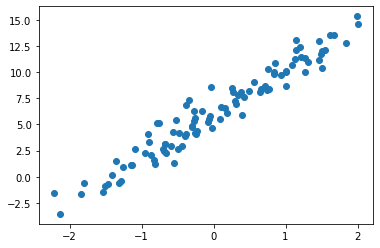

In [27]:
import matplotlib.pyplot as plt

# generate some data
n = 100
w = 4
b = 6

x = torch.randn(n)
y = x * w + b
y += torch.randn(y.shape)

plt.scatter(x, y)

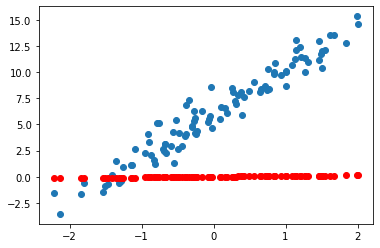

In [28]:
var_w = torch.rand(1, requires_grad=True)
var_b = torch.rand(1, requires_grad=True)


def plot_model(w, b):
    plt.scatter(x, y)    
    plt.scatter(x, x * w.detach().numpy() + b.detach().numpy(), color='red')


plot_model(var_w, var_b)

In [29]:
lr = 0.001


for i in range(1000):
    f = x * var_w + var_b

    loss = torch.sum((f - y) ** 2)

    if var_w.grad is not None:
        var_w.grad.zero_()
        var_b.grad.zero_()

    loss.backward()

    if i % 100 == 0:
        print(loss.item())

    with torch.no_grad():
        var_w -= lr * var_w.grad
        var_b -= lr * var_b.grad

5653.078125
107.09107971191406
107.09107971191406
107.09107971191406
107.09107971191406
107.09107971191406
107.09107971191406
107.09107971191406
107.09107971191406
107.09107971191406


tensor([4.1495], requires_grad=True)
tensor([6.0791], requires_grad=True)


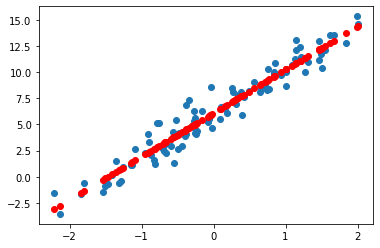

In [30]:
plot_model(var_w, var_b)
print(var_w)
print(var_b)

## Fit non-linear model

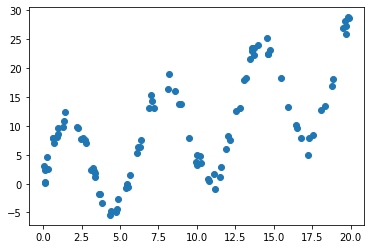

In [31]:
x = torch.rand(n, 1) * 20
y = 10 * torch.sin(x) + x
y += torch.randn(y.shape)

plt.scatter(x, y)

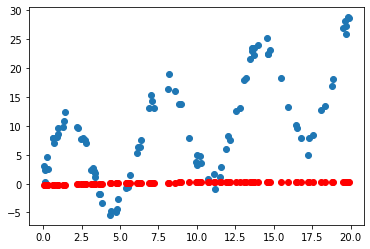

In [32]:
import torch.nn as nn


def plot_model(model):
    plt.scatter(x, y)
    plt.scatter(x, model(x).detach(), color='red')


model = nn.Sequential(nn.Linear(1, 100), 
                      nn.Tanh(),
                      nn.Linear(100, 1))

plot_model(model)

In [33]:
from torch.optim import Adam

lr = 0.01
optimizer = Adam(model.parameters(), lr=lr)

for i in range(5000):
    f = model(x)

    loss = torch.sum((f - y) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 1000 == 0:
        print(loss.item())

16946.697265625
1878.105712890625
83.17173767089844
73.77159881591797
69.08121490478516


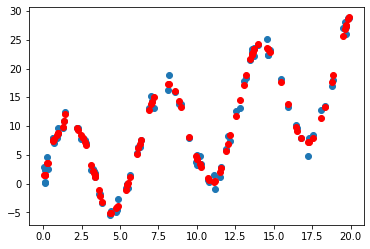

In [34]:
plot_model(model)